In [1]:
import fitting_tools as ft
import time
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [2]:
data0 = np.random.random((2,100))
data1 = np.random.random((2,100))


<IPython.core.display.Javascript object>


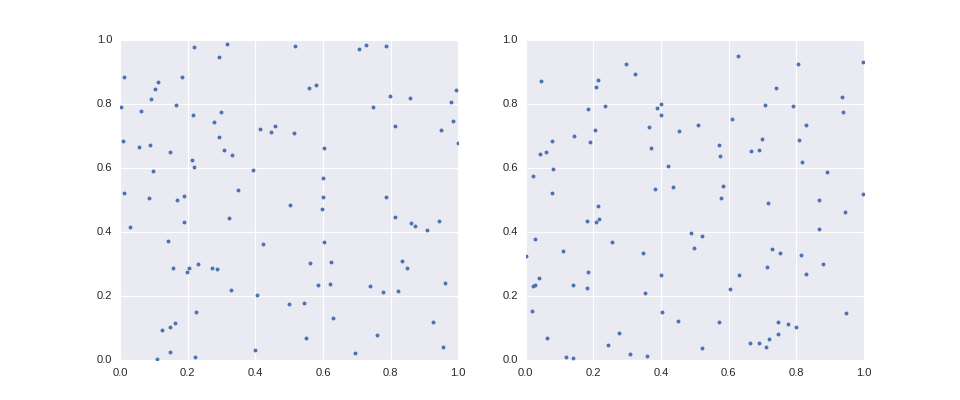

In [3]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(data0[0],data0[1],'.')
plt.subplot(1,2,2)
plt.plot(data1[0],data1[1],'.')

In [4]:
start = time.time()
nn_CPU = ft.nn(data0,data1,nneighbors=5)
print "This took %f seconds to run" % (time.time()-start)

This took 0.001103 seconds to run


In [5]:
start = time.time()
nn_GPU = ft.nn(data0,data1,nneighbors=5)
print "This took %f seconds to run" % (time.time()-start)

This took 0.000970 seconds to run


<IPython.core.display.Javascript object>


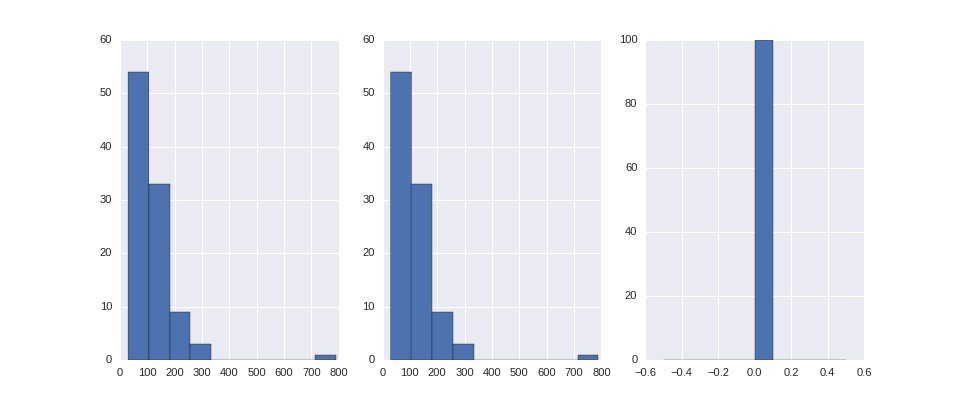

(array([   0.,    0.,    0.,    0.,    0.,  100.,    0.,    0.,    0.,    0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.hist(nn_CPU,label="CPU")
plt.subplot(1,3,2)
plt.hist(nn_GPU,label="GPU")
plt.subplot(1,3,3)
plt.hist(nn_GPU-nn_CPU,label="diff")

In [7]:
# Get the GPU info
import numba
import math
npts = 100
my_gpu = numba.cuda.get_current_device()
thread_ct = my_gpu.WARP_SIZE
block_ct = int(math.ceil(float(npts) / thread_ct))

frac_nn_GPU = np.zeros(npts, dtype = np.float32)


start = time.time()
#ft.nn_GPU[block_ct,thread_ct](np.float32(data0[0]), np.float32(data0[1]), np.float32(data1[0]), np.float32(data1[1]), frac_nn_GPU, nneighbors=5)

#ft.number_of_nearest_neighbors_GPU[block_ct,thread_ct](np.float32(data0[0]), np.float32(data0[1]), np.float32(data1[0]), np.float32(data1[1]), frac_nn_GPU, nneighbors=5)
#ft.number_of_nearest_neighbors_GPU[block_ct, thread_ct](np.float32(data0[0]), np.float32(data0[1]), np.float32(data1[0]), np.float32(data1[1]), frac_nn_GPU, 0.1)
print "Time for GPU implementation:  %f" % (time.time()-start)

Time for GPU implementation:  0.000033


In [8]:
def bubblesort(X):
    N = len(X)
    for end in range(N, 1, -1):
        for i in range(end - 1):
            cur = X[i]
            if cur > X[i + 1]:
                tmp = X[i]
                X[i] = X[i + 1]
                X[i + 1] = tmp

In [9]:
#array=np.array([4,5,11,3,1,9,0,8,30])
#array = np.random.random(10000)
#bubblesort(array)
#print array

In [10]:
#array=np.array([4,5,11,3,1,9,0,8,30])
array = np.random.random(1024)
ft.bubblesort_jit[32,32](array)
print array

[ 0.00377892  0.00442724  0.00613281 ...,  0.99886013  0.99886013
  0.99966617]


In [11]:
import accelerate.cuda.sorting as csort

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [12]:
#npts = 16777216
npts = 16384
array = np.random.random(npts)

print array
start = time.time()
array.sort()
print "This sort took %f seconds" % (time.time()-start)
print array


[ 0.24405117  0.19357105  0.98585518 ...,  0.49914028  0.22727037
  0.35307334]
This sort took 0.000976 seconds
[  8.30096177e-05   1.12354879e-04   2.42183041e-04 ...,   9.99777058e-01
   9.99893941e-01   9.99903953e-01]


In [13]:
mysort = csort.RadixSort(npts,float)

array = np.random.random(npts)
print array
start = time.time()
mysort.sort(array)
print "This sort took %f seconds" % (time.time()-start)
print array


[ 0.00855599  0.46097475  0.37085373 ...,  0.42275465  0.14257567
  0.38266322]
This sort took 0.001864 seconds
[  2.00428911e-04   3.92051642e-04   4.29020278e-04 ...,   9.99649909e-01
   9.99719100e-01   9.99814699e-01]


In [14]:
array = np.random.random(1024)
print array
mysort.sort(array)
print array

[ 0.7401259   0.41678137  0.30053342 ...,  0.46132976  0.51801575
  0.29710787]
[  7.56328980e-04   9.80231633e-04   2.03221721e-03 ...,   9.96277711e-01
   9.98121161e-01   9.98352930e-01]


In [21]:
npts = 10000

ndata = 1000
nMC = 10000

array = np.random.random((ndata,nMC))

start = time.time()
array = array.flatten()
index = np.arange(0,ndata*nMC).astype(np.uint32)
x = np.arange(nMC,ndata*nMC,nMC).astype(np.uint32)

segsort = csort.segmented_sort(array,index,x)
print "This sort took %f seconds" % (time.time()-start)

print array[nMC-10:nMC]
print array[nMC:nMC+10]


This sort took 0.119135 seconds
[ 0.99891535  0.99903379  0.99904239  0.99904434  0.99905701  0.9991828
  0.9992579   0.99944489  0.9996747   0.99986633]
[ 0.00013159  0.00017737  0.00023029  0.00026823  0.0002973   0.00044986
  0.00050689  0.00059522  0.00061662  0.00064508]


In [22]:
array = np.random.random((ndata,nMC))

start = time.time()
for a in array:
    a.sort()
print "This sort took %f seconds" % (time.time()-start)


This sort took 0.441377 seconds


In [17]:
array[1]

array([  1.37829930e-04,   1.40799487e-04,   4.80273698e-04, ...,
         9.99899343e-01,   9.99911897e-01,   9.99936697e-01])

In [18]:
x

array([   10000,    20000,    30000, ..., 99970000, 99980000, 99990000], dtype=uint32)